In [1]:
# Este projeto procurará obter, estruturar e mostrar dados relativos a pandemia, como projeto avançado de python para cientista de dados

import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

#import matplotlib
import matplotlib.pyplot as plt
import warnings
import statistics
from pandas._libs.hashtable import value_count
from statistics import mean 
from scipy import stats


In [2]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [3]:
# Verificando campos nulos
print(df.isna().sum())
# Verificando a consistência dos dados
print(df.describe(include = 'all'))
# Verificando dados únicos
print(df.nunique().sort_values())
# Removendo as linhas com valores duplicados
df_drop = df.drop_duplicates()
print(df_drop)

SNo                    0
ObservationDate        0
Province/State     13831
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
                 SNo      ObservationDate                Province/State  \
count   26713.000000                26713                         12882   
unique           NaN                  119                           354   
top              NaN  2020-05-19 00:00:00  Diamond Princess cruise ship   
freq             NaN                  377                           175   
first            NaN  2020-01-22 00:00:00                           NaN   
last             NaN  2020-05-19 00:00:00                           NaN   
mean    13357.000000                  NaN                           NaN   
std      7711.523207                  NaN                           NaN   
min         1.000000                  NaN                           NaN   
25%      6679.000000                 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


In [4]:
df.rename(
    columns = {
        'SNo':'SNo', 
        'ObservationDate':'ObservationDate', 
        'Province/State':'Province_State', 
        'Country/Region': 'Country_Region', 
        'Last Update': 'Last_Update',
        'Confirmed': 'Confirmed', 
        'Deaths':'Deaths', 
        'Recovered':'Recovered'
    },
    inplace = True
)
df.columns

Index(['SNo', 'ObservationDate', 'Province_State', 'Country_Region',
       'Last_Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
print(df["Country_Region"].unique())

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

In [6]:
df["Country_Region"].describe()

count     26713
unique      223
top          US
freq       4990
Name: Country_Region, dtype: object

In [7]:
print(df["Province_State"].unique())

['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Taiwan' 'Tianjin' 'Tibet' 'Washington' 'Xinjiang' 'Yunnan' 'Zhejiang'
 nan 'Chicago' 'Illinois' 'California' 'Arizona' 'Ontario'
 'New South Wales' 'Victoria' 'British Columbia' 'Bavaria' 'Queensland'
 'Chicago, IL' 'South Australia' 'Boston, MA' 'Los Angeles, CA'
 'Orange, CA' 'Santa Clara, CA' 'Seattle, WA' 'Tempe, AZ' 'San Benito, CA'
 'Toronto, ON' 'London, ON' 'Madison, WI' 'Cruise Ship'
 'Diamond Princess cruise ship' 'San Diego County, CA' 'San Antonio, TX'
 'Ashland, NE' 'Travis, CA' 'From Diamond Princess' 'Lackland, TX' 'None'
 'Humboldt County, CA' 'Sacramento County, CA'
 'Omaha, NE (From Diamond Princess)' 'Travis, CA (From Diamond Princess)'
 'Lackland, TX (From Diamond Princess)'
 'Unassi

In [8]:
df["Province_State"].describe()

count                            12882
unique                             354
top       Diamond Princess cruise ship
freq                               175
Name: Province_State, dtype: object

In [9]:
print(df.nlargest(4, "Deaths"))
print(df.nlargest(4, "Confirmed"))

         SNo ObservationDate Province_State Country_Region  \
26504  26505      2020-05-19            NaN             UK   
26127  26128      2020-05-18            NaN             UK   
25750  25751      2020-05-17            NaN             UK   
25373  25374      2020-05-16            NaN             UK   

              Last_Update  Confirmed   Deaths  Recovered  
26504 2020-05-20 02:32:19   248818.0  35341.0        0.0  
26127 2020-05-19 02:32:18   246406.0  34796.0        0.0  
25750 2020-05-18 02:32:21   243695.0  34636.0        0.0  
25373 2020-05-17 02:32:32   240161.0  34466.0        0.0  
         SNo ObservationDate Province_State Country_Region  \
26638  26639      2020-05-19       New York             US   
26261  26262      2020-05-18       New York             US   
25884  25885      2020-05-17       New York             US   
25507  25508      2020-05-16       New York             US   

              Last_Update  Confirmed   Deaths  Recovered  
26638 2020-05-20 02:32:1

In [10]:
UK = df.loc[(df.Country_Region == 'UK') & (df.Confirmed > 0)]
Italy = df.loc[(df.Country_Region == 'Italy') & (df.Confirmed > 0)]
US = df.loc[(df.Country_Region == 'US') & (df.Confirmed > 0)]
BR = df.loc[(df.Country_Region == 'Brazil') & (df.Confirmed > 0)]

In [11]:
UK

,SNo,ObservationDate,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered
481,482,2020-01-31,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,2020-02-01,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,2020-02-02,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,2020-02-03,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,2020-02-04,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26564,26565,2020-05-19,Falkland Islands (Malvinas),UK,2020-05-20 02:32:19,13.0,0.0,13.0
26574,26575,2020-05-19,Gibraltar,UK,2020-05-20 02:32:19,147.0,0.0,145.0
26598,26599,2020-05-19,Isle of Man,UK,2020-05-20 02:32:19,335.0,24.0,300.0
26627,26628,2020-05-19,Montserrat,UK,2020-05-20 02:32:19,11.0,1.0,10.0


In [12]:
px.line?

In [13]:
px.line(UK, 'ObservationDate', 'Confirmed', 
        labels={'ObservationDate':'Data', 'Confirmed':'Número de casos confirmados'},
       title='Casos confirmados no Reino Unido (UK), com maiores óbitos até o momento')

In [14]:
import matplotlib
import matplotlib.pyplot as plt

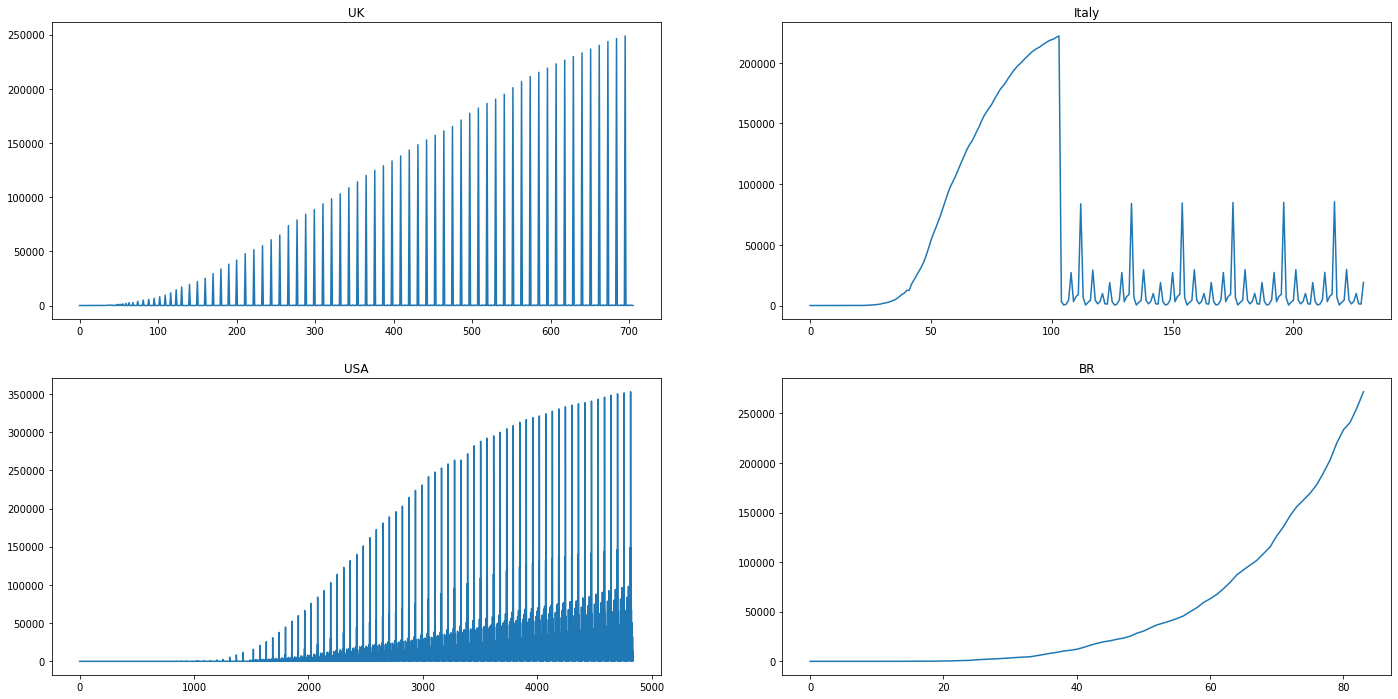

In [15]:
X1 = np.arange(len(UK))
X2 = np.arange(len(Italy))
X3 = np.arange(len(US))
X4 = np.arange(len(BR))
Y1 = UK["Confirmed"]
Y2 = Italy["Confirmed"]
Y3 = US["Confirmed"]
Y4 = BR["Confirmed"]
plt.rcParams['figure.figsize'] = (24,12)
figure, axis = plt.subplots(2, 2) 

axis[0, 0].plot(X1, Y1) 
axis[0, 0].set_title("UK") 
axis[0, 1].plot(X2, Y2) 
axis[0, 1].set_title("Italy") 
axis[1, 0].plot(X3, Y3) 
axis[1, 0].set_title("USA") 
axis[1, 1].plot(X4, Y4) 
axis[1, 1].set_title("BR") 


plt.show();

In [16]:
# Vamos implementar uma função para fazer a contagem de novos casos
UK['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else UK['Confirmed'].iloc[x] - UK['Confirmed'].iloc[x-1],
    np.arange(UK.shape[0])
))
US['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else US['Confirmed'].iloc[x] - US['Confirmed'].iloc[x-1],
    np.arange(US.shape[0])
))
BR['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else BR['Confirmed'].iloc[x] - BR['Confirmed'].iloc[x-1],
    np.arange(BR.shape[0])
))
Italy['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else Italy['Confirmed'].iloc[x] - Italy['Confirmed'].iloc[x-1],
    np.arange(Italy.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [17]:
# Visualizando
px.line(BR, x='ObservationDate', y='novoscasos', title='Novos casos por dia',
       labels={'ObservationDate': 'Data', 'novoscasos': 'Novos casos'})

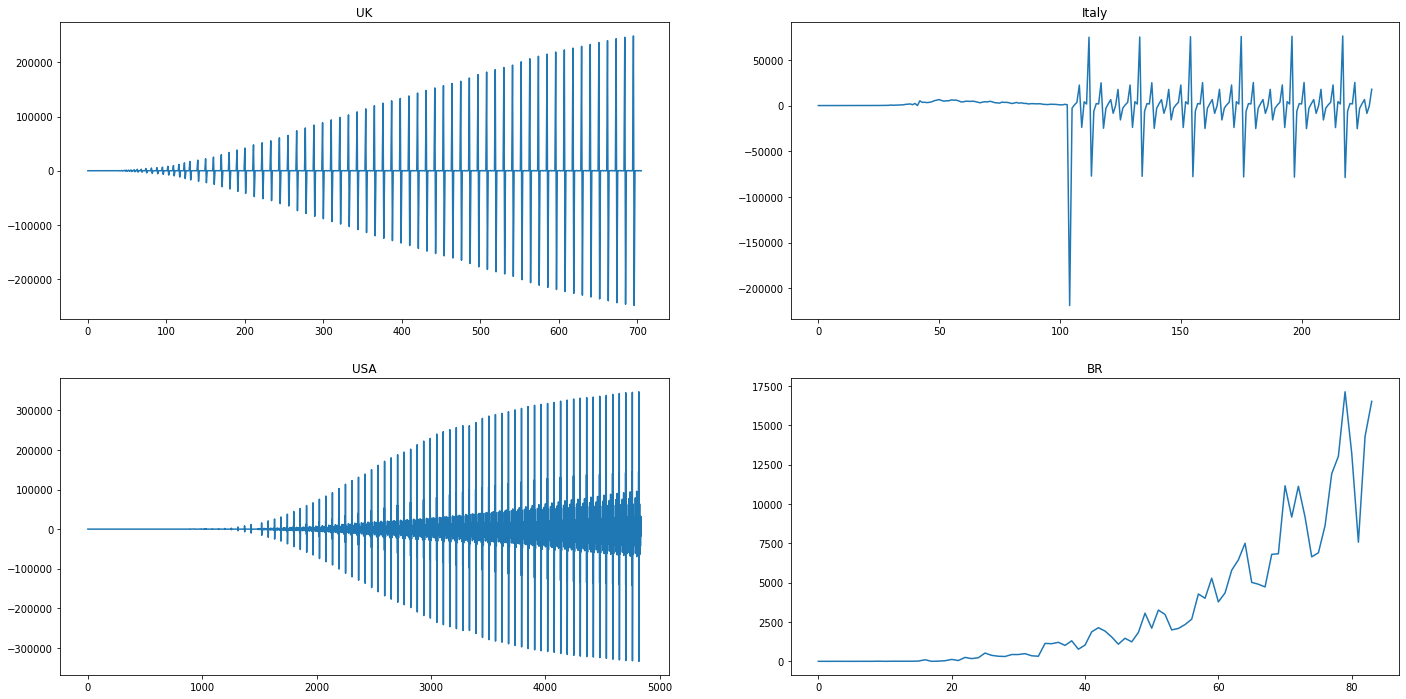

In [18]:
X1 = np.arange(len(UK))
X2 = np.arange(len(Italy))
X3 = np.arange(len(US))
X4 = np.arange(len(BR))
Y1 = UK["novoscasos"]
Y2 = Italy["novoscasos"]
Y3 = US["novoscasos"]
Y4 = BR["novoscasos"]

figure, axis = plt.subplots(2, 2) 

axis[0, 0].plot(X1, Y1) 
axis[0, 0].set_title("UK") 
axis[0, 1].plot(X2, Y2) 
axis[0, 1].set_title("Italy") 
axis[1, 0].plot(X3, Y3) 
axis[1, 0].set_title("USA") 
axis[1, 1].plot(X4, Y4) 
axis[1, 1].set_title("BR") 

plt.show();

In [19]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.ObservationDate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.ObservationDate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    passado = data.loc[data.ObservationDate == data_inicio, variable].values[0]
    presente = data.loc[data.ObservationDate == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [20]:
cresc_medioBR = taxa_crescimento(BR, 'Confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medioBR.round(2)}%.")
cresc_medioUK = taxa_crescimento(UK, 'Confirmed')
print(f"O crescimento médio do COVID no Reino Unido no período avaliado foi de {cresc_medioUK.round(2)}%.")
cresc_medioUS = taxa_crescimento(US, 'Confirmed')
print(f"O crescimento médio do COVID no USA no período avaliado foi de {cresc_medioUS.round(2)}%.")
cresc_medioItaly = taxa_crescimento(Italy, 'Confirmed')
print(f"O crescimento médio do COVID no Italy no período avaliado foi de {cresc_medioItaly.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 16.27%.
O crescimento médio do COVID no Reino Unido no período avaliado foi de 11.36%.
O crescimento médio do COVID no USA no período avaliado foi de 8.31%.
O crescimento médio do COVID no Italy no período avaliado foi de 7.0%.


In [21]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.ObservationDate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.ObservationDate.max()
    n = (data_fim - data_inicio).days
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)
    ))
    return np.array(taxas)*100

In [22]:
tx_diaBR = taxa_crescimento_diaria(BR, 'Confirmed')
tx_diaUK = taxa_crescimento_diaria(UK, 'Confirmed')
tx_diaUS = taxa_crescimento_diaria(US, 'Confirmed')
tx_diaItaly = taxa_crescimento_diaria(Italy, 'Confirmed')

In [23]:
primeiro_diaBR = BR.ObservationDate.loc[BR.Confirmed > 0].min()
primeiro_diaUK = UK.ObservationDate.loc[UK.Confirmed > 0].min()
primeiro_diaUS = US.ObservationDate.loc[US.Confirmed > 0].min()
primeiro_diaItaly = Italy.ObservationDate.loc[Italy.Confirmed > 0].min()
px.line(x=pd.date_range(primeiro_diaBR, BR.ObservationDate.max())[1:],
        y=tx_diaBR, title='Taxa de crescimento de casos confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})

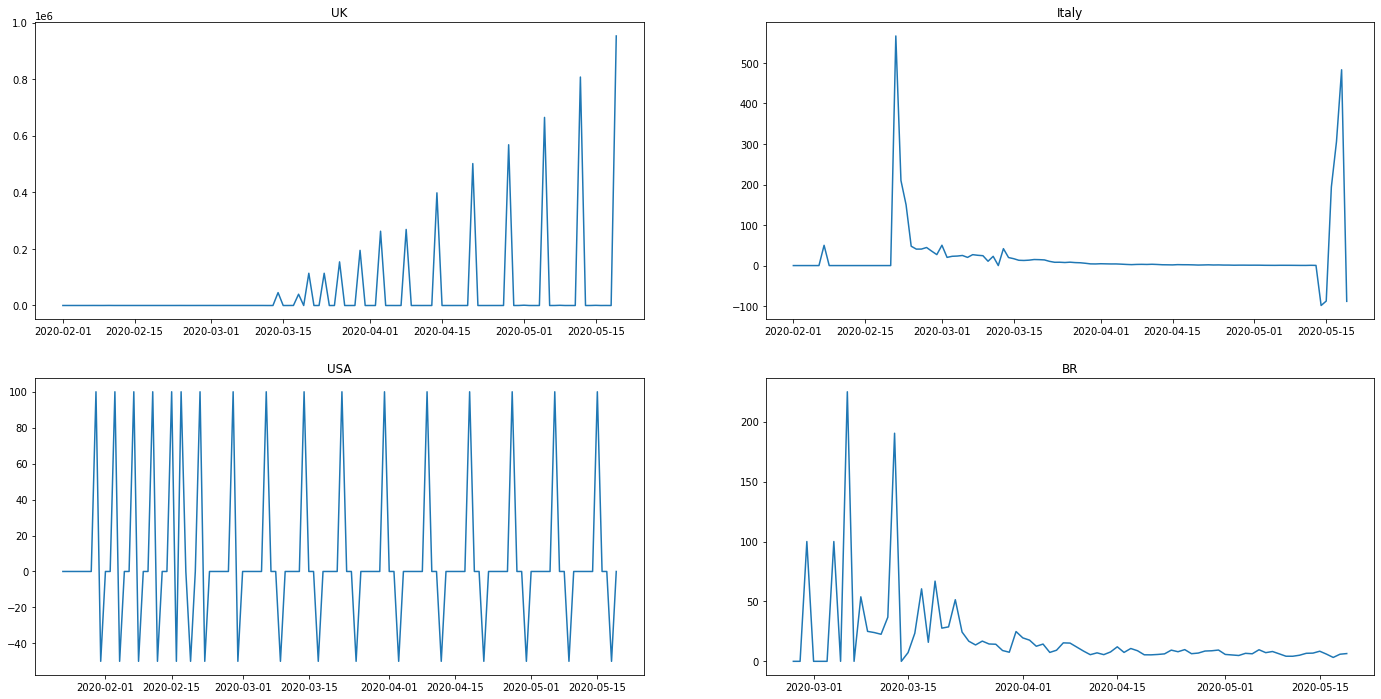

In [24]:
X1 = pd.date_range(primeiro_diaUK, UK.ObservationDate.max())[1:]
X2 = pd.date_range(primeiro_diaItaly, Italy.ObservationDate.max())[1:]
X3 = pd.date_range(primeiro_diaUS, US.ObservationDate.max())[1:]
X4 = pd.date_range(primeiro_diaBR, BR.ObservationDate.max())[1:]
Y1 = tx_diaUK
Y2 = tx_diaItaly
Y3 = tx_diaUS
Y4 = tx_diaBR

figure, axis = plt.subplots(2, 2) 

axis[0, 0].plot(X1, Y1) 
axis[0, 0].set_title("UK") 
axis[0, 1].plot(X2, Y2) 
axis[0, 1].set_title("Italy") 
axis[1, 0].plot(X3, Y3) 
axis[1, 0].set_title("USA") 
axis[1, 1].plot(X4, Y4) 
axis[1, 1].set_title("BR") 

plt.show();

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

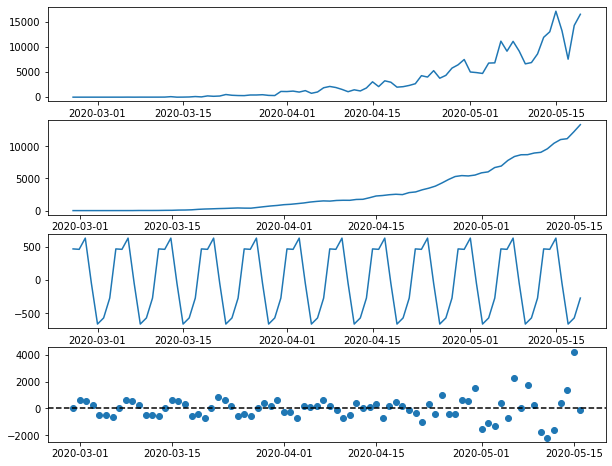

In [26]:
novoscasos = BR.novoscasos
novoscasos.index = BR.ObservationDate

res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

In [27]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from pmdarima.arima import auto_arima

In [29]:
confirmados = BR.Confirmed
confirmados.index = BR.ObservationDate

In [30]:
modelo = auto_arima(confirmados)

In [31]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

In [32]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-05-20', '2020-06-05'), y=modelo.predict(15), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 15 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()

In [33]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 1.4 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 980 kB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6193517 sha256=a13b6d6559a0af669717212f106e0ab780f6ee7b67c3386ea065f746e8486cff
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [34]:
from fbprophet import Prophet

In [43]:
confirmados_recentes = confirmados#.loc[confirmados.index >= '2021-04-01']

In [44]:
# preparando os dados
train = confirmados_recentes.reset_index()[:-5]
test = confirmados_recentes.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"ObservationDate" : "ds", "Confirmed" : "y"}, inplace=True)
test.rename(columns={"ObservationDate" : "ds", "Confirmed" : "y"}, inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-03-21',
                                                  '2020-03-30',
                                                  '2020-04-25',
                                                  '2020-05-03',
                                                  '2020-05-10'])

#pop = 35000000
pop = 215301104 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php População do Brasil
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=30)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()